# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

%matplotlib inline

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# 2. Import Datasets

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 3. Take a Look

In [3]:
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [4]:
train.shape

(75757, 64)

In [5]:
test.shape

(9705, 63)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

<AxesSubplot:>

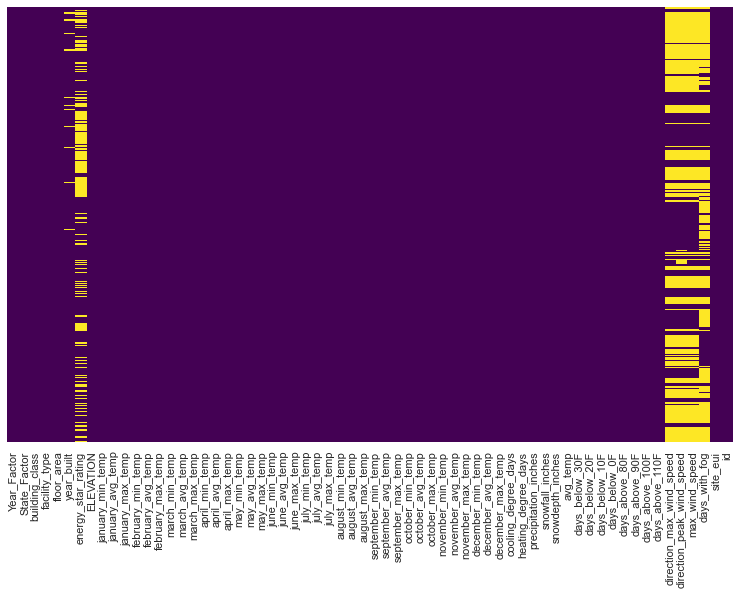

In [7]:
fig, ax = plt.subplots(figsize=(13,8))       
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
nbr_nulls_train = train.isnull().sum()
nbr_nulls_train[nbr_nulls_train > 0]

year_built                    1837
energy_star_rating           26709
direction_max_wind_speed     41082
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
dtype: int64

In [9]:
nbr_nulls_test = test.isnull().sum()
nbr_nulls_test[nbr_nulls_test > 0]

year_built                     92
energy_star_rating           2254
direction_max_wind_speed     8575
direction_peak_wind_speed    8575
max_wind_speed               8575
days_with_fog                9117
dtype: int64

In [32]:
descr = train.describe()
descr

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,58.486278,21.606281,44.469292,70.897831,32.037171,53.784863,82.661932,44.706179,63.742547,88.987856,51.131763,71.066384,91.400280,60.571604,76.596879,95.543950,58.515068,75.348749,92.572581,50.791689,69.597545,92.171139,38.210911,58.727038,81.135671,28.630397,48.123133,71.202397,22.736777,41.625569,64.496852,1202.250446,4324.957390,42.430651,29.136379,164.862455,56.176705,48.756511,17.447932,4.886532,0.876764,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,8.414611,10.004303,6.657142,7.680982,5.577279,2.500473,4.101028,4.200319,2.792919,2.864669,3.415926,2.861681,3.604068,4.177109,4.090275,4.157118,4.441992,3.818895,4.139685,4.290884,3.603773,5.011708,5.093899,2.641300,5.579513,7.153244,4.094207,4.373374,9.014047,5.869386,6.054104,391.561780,824.366727,10.592205,17.810894,175.275869,2.241940,27.587124,14.469435,7.071221,2.894244,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,38.000000,-9.000000,25.854839,53.000000,15.000000,40.280000,62.000000,23.000000,46.950000,64.000000,30.000000,54.100000,67.000000,37.000000,54.822581,65.000000,31.000000,56.693548,66.000000,26.000000,53.600000,64.000000,18.000000,44.693548,59.000000,4.000000,30.766667,53.000000,-16.000000,23.790323,42.000000,0.000000,398.000000,0.000000,0.000000,0.000000,44.512329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,55.000000,13.000000,38.096774,62.000000,26.000000,52.333333,80.000000,42.000000,62.790323,88.000000,50.000000,70.983333,89.000000,57.000000,76.145161,95.000000,57.000000,74.516129,90.000000,47.000000,68.200000,91.000000,35.000000,58.048387,78.000000,23.000000,45.250000,69.000000,17.000000,38.532258,60.000000,1128.000000,3978

In [11]:
train.duplicated().sum()

0

In [12]:
corrs = train.corr()
site_eui_corr = corrs['site_eui']
site_eui_corr.sort_values()

energy_star_rating          -0.511012
january_min_temp            -0.179190
january_avg_temp            -0.167982
february_avg_temp           -0.154071
february_min_temp           -0.147348
march_avg_temp              -0.135303
march_min_temp              -0.134110
april_avg_temp              -0.113008
april_min_temp              -0.111528
february_max_temp           -0.106693
november_min_temp           -0.100349
january_max_temp            -0.097070
october_min_temp            -0.095334
avg_temp                    -0.089201
april_max_temp              -0.078969
november_avg_temp           -0.069882
march_max_temp              -0.064302
december_min_temp           -0.058888
days_with_fog               -0.055388
december_avg_temp           -0.050328
days_above_100F             -0.050029
Year_Factor                 -0.045179
october_avg_temp            -0.040162
june_max_temp               -0.029233
id                          -0.026500
days_above_110F             -0.014190
days_above_9

In [13]:
corrs2 = train.corr()
ener_star_corr = corrs2['energy_star_rating']
ener_star_corr.sort_values()

site_eui                    -0.511012
snowfall_inches             -0.140722
heating_degree_days         -0.133304
days_below_30F              -0.132442
days_below_20F              -0.113404
snowdepth_inches            -0.111075
precipitation_inches        -0.109899
july_avg_temp               -0.107087
june_avg_temp               -0.106010
cooling_degree_days         -0.098710
july_min_temp               -0.093468
august_avg_temp             -0.093280
september_avg_temp          -0.087785
august_min_temp             -0.080867
days_below_10F              -0.076361
days_above_80F              -0.074993
year_built                  -0.073857
may_avg_temp                -0.072969
september_max_temp          -0.062982
december_max_temp           -0.050553
september_min_temp          -0.047610
june_min_temp               -0.039391
august_max_temp             -0.027211
id                          -0.025448
may_min_temp                -0.021194
days_below_0F               -0.019048
ELEVATION   

In [14]:
col_list = train.columns
col_list

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [15]:
# SAMPLE OF BREAKING THE DS INTO A FEW COLUMNS AT A TIME SO IT'S EASIER TO SEE THE PAIRPLOT RESULTS

# df1 = train[['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
#        'floor_area', 'energy_star_rating', 'ELEVATION', 'site_eui']]
# sns.pairplot(data=df1, hue='Year_Factor')
# corr_1 = df1.corr()

### How many unique buildings are there (ie, is each ID associated with a different building?)

In [16]:
train['id'].nunique()

75757

In [17]:
test.id.nunique()

9705

## 1. Year Factor

In [20]:
train['Year_Factor'].unique()

array([1, 2, 3, 4, 5, 6])

## 2. State Factor

In [21]:
train['State_Factor'].unique()

array(['State_1', 'State_2', 'State_4', 'State_6', 'State_8', 'State_10',
       'State_11'], dtype=object)

## 3. Building Class

In [22]:
train['building_class'].unique()

array(['Commercial', 'Residential'], dtype=object)

## 4. Facility Type

In [23]:
train['facility_type'].nunique()

60

In [31]:
train['facility_type'].unique()

array(['Grocery_store_or_food_market',
       'Warehouse_Distribution_or_Shipping_center',
       'Retail_Enclosed_mall', 'Education_Other_classroom',
       'Warehouse_Nonrefrigerated', 'Warehouse_Selfstorage',
       'Office_Uncategorized', 'Data_Center', 'Commercial_Other',
       'Mixed_Use_Predominantly_Commercial',
       'Office_Medical_non_diagnostic', 'Education_College_or_university',
       'Industrial', 'Laboratory',
       'Public_Assembly_Entertainment_culture',
       'Retail_Vehicle_dealership_showroom', 'Retail_Uncategorized',
       'Lodging_Hotel', 'Retail_Strip_shopping_mall',
       'Education_Uncategorized', 'Health_Care_Inpatient',
       'Public_Assembly_Drama_theater', 'Public_Assembly_Social_meeting',
       'Religious_worship', 'Mixed_Use_Commercial_and_Residential',
       'Office_Bank_or_other_financial', 'Parking_Garage',
       'Commercial_Unknown', 'Service_Vehicle_service_repair_shop',
       'Service_Drycleaning_or_Laundry', 'Public_Assembly_Recreation

## 5. Floor Area

In [33]:
descr['floor_area']

count    7.575700e+04
mean     1.659839e+05
std      2.468758e+05
min      9.430000e+02
25%      6.237900e+04
50%      9.136700e+04
75%      1.660000e+05
max      6.385382e+06
Name: floor_area, dtype: float64

## 6. Year Built

In [34]:
descr['year_built']

count    73920.000000
mean      1952.306764
std         37.053619
min          0.000000
25%       1927.000000
50%       1951.000000
75%       1977.000000
max       2015.000000
Name: year_built, dtype: float64

In [50]:
test['year_built'].unique()

array([1994., 1961., 1950., 1971., 1942., 1959., 1941., 1900., 1992.,
       1967., 1957., 1986., 1996., 2013., 2010., 2014., 2016., 2002.,
       2008., 2012., 1991., 1955., 1978., 1989., 2006., 1981., 1965.,
       1997., 1999., 1980., 1990., 1995., 2011., 2003., 1987., 1970.,
       1962., 1984., 1953., 1998., 1956., 1946., 1909., 1905., 1958.,
         nan, 1972., 1908., 1912., 1925., 1865., 1914., 1926., 1920.,
       1924., 1935., 1913., 1979., 1918., 1906., 1911., 1949., 1936.,
       1931., 1948., 1966., 1910., 1923., 1939., 1951., 1945., 1954.,
       1904., 1844., 1868., 1898., 1927., 1893., 1928., 1968., 2000.,
       1922., 1963., 1952., 1977., 1947., 1938., 1919., 1973., 1985.,
       1960., 1964., 1896., 1988., 2005., 2009., 1982., 1937., 1884.,
       1969., 1975., 2001., 1930., 1976., 1929., 1934., 2015., 2007.,
       1907., 1902., 1915., 1921., 1944., 1940., 1916., 2004., 1917.,
       1983., 1974., 1879., 1903., 1882., 1932., 1891., 1885., 1889.,
       1993., 1901.,

In [37]:
train['year_built'].unique()

array([1942., 1955., 1951., 1980., 1985., 1956., 1982., 1947., 1929.,
       1979., 1927., 1960., 1924.,   nan, 1949., 1926., 1914., 1973.,
       1900., 1913., 1962., 1989., 1967., 1954., 1986., 1906., 1912.,
       1902., 1920., 1905., 1997., 1909., 2002., 1974., 1907., 1908.,
       1988., 1987., 1923., 1948., 1966., 1975., 1934., 1938., 1983.,
       2003., 1915., 1961., 1911., 1925., 1964., 1953., 1957., 2006.,
       1990., 1991., 1969., 1968., 1910., 1937., 1971., 1965., 1946.,
       1917., 1901., 2000., 2008., 1999., 1981., 2001., 1978., 1898.,
       1928., 1970., 1918., 1930., 1903., 1936., 1921., 1922., 1984.,
       1976., 1952., 1959., 1916., 1963., 1972., 1919., 1931., 1958.,
          0., 1994., 1940., 2010., 2009., 1889., 1939., 1945., 1904.,
       1932., 1941., 1977., 1993., 1992., 1950., 1944., 1935., 1996.,
       1995., 1933., 1943., 2007., 2005., 2004., 1869., 2011., 2012.,
       1864., 1998., 1895., 1896., 1875., 1880., 1888., 1897., 1891.,
       2013., 1887.,

In [51]:
con1 = train['year_built'] == 0
con2 = train['year_built'].isna()
has_year_train = train[~con1 & ~con2]

con1 = test['year_built'] == 0
con2 = test['year_built'].isna()
has_year_test = test[~con1 & ~con2]

In [52]:
has_year_train.describe()['year_built']

count    73914.000000
mean      1952.465243
std         32.613687
min       1600.000000
25%       1927.000000
50%       1951.000000
75%       1977.000000
max       2015.000000
Name: year_built, dtype: float64

In [53]:
has_year_test.describe()['year_built']

count    9612.000000
mean     1963.423845
std        35.572142
min      1756.000000
25%      1929.000000
50%      1969.000000
75%      1994.000000
max      2016.000000
Name: year_built, dtype: float64

## 7. Energy Star Rating

In [54]:
descr['energy_star_rating']

count    49048.000000
mean        61.048605
std         28.663683
min          0.000000
25%         40.000000
50%         67.000000
75%         85.000000
max        100.000000
Name: energy_star_rating, dtype: float64

In [57]:
con = train['energy_star_rating'] == 0
train[con].shape

(1, 64)

## 8. Elevation

In [58]:
descr['ELEVATION']

count    75757.000000
mean        39.506323
std         60.656596
min         -6.400000
25%         11.900000
50%         25.000000
75%         42.700000
max       1924.500000
Name: ELEVATION, dtype: float64

## 9 - 45. Temps

In [64]:
temps_cols = ['january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp']

In [67]:
descr[temps_cols]

,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp
count,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000
mean,11.432343,34.310468,59.054952,11.720567,35.526837,58.486278,21.606281,44.469292,70.897831,32.037171,53.784863,82.661932,44.706179,63.742547,88.987856,51.131763,71.066384,91.400280,60.571604,76.596879,95.543950,58.515068,75.348749,92.572581,50.791689,69.597545,92.171139,38.210911,58.727038,81.135671,28.630397,48.123133,71.202397,22.736777,41.625569,64.496852
std,9.381027,6.996108,5.355458,12.577272,8.866697,8.414611,10.004303,6.657142,7.680982,5.577279,2.500473,4.101028,4.200319,2.792919,2.864669,3.415926,2.861681,3.604068,4.177109,4.090275,4.157118,4.441992,3.818895,4.139685,4.290884,3.603773,5.011708,5.093899,2.641300,5.579513,7.153244,4.094207,4.373374,9.014047,5.869386,6.054104
min,-19.000000,10.806452,42.000000,-13.000000,13.250000,38.000000,-9.000000,25.854839,53.000000,15.000000,40.280000,62.000000,23.000000,46.950000,64.000000,30.000000,54.100000,67.000000,37.000000,54.822581,65.000000,31.000000,56.693548,66.000000,26.000000,53.600000,64.000000,18.000000,44.693548,59.000000,4.000000,30.766667,53.000000,-16.000000,23.790323,42.000000
25%,6.000000,29.827586,56.000000,2.000000,31.625000,55.000000,13.000000,38.096774,62.000000,26.000000,52.333333,80.000000,42.000000,62.790323,88.000000,50.000000,70.983333,89.000000,57.000000,76.145161,95.000000,57.000000,74.516129,90.000000,47.000000,68.200000,91.000000,35.000000,58.048387,78.000000,23.000000,45.250000,69.000000,17.000000,38.532258,60.000000
50%,11.000000,34.451613,59.000000,9.000000,34.107143,61.000000,25.000000,44.516129,71.000000,32.000000,53.333333,82.000000,45.000000,62.887097,89.000000,52.000000,72.250000,90.000000,63.000000,78.677419,96.000000,61.000000,75.725806,91.000000,52.000000,69.733333,92.000000,38.000000,58.758065,80.000000,31.000000,47.116667,72.000000,24.000000,40.516129,65.000000
75%,13.000000,37.322581,62.000000,20.000000,40.879310,62.000000,27.000000,49.354839,78.000000,37.000000,54.766667,87.000000,49.000000,65.096774,91.000000,53.000000,72.450000,94.000000,63.000000,78.790323,98.000000,61.000000,78.967742,95.000000,54.000000,71.800000,96.000000,40.000000,59.629032,85.000000,34.000000,51.339286,74.000000,28.000000,43.435484,71.000000
max,49.000000,64.758065,91.000000,48.000000,65.107143,89.000000,52.000000,69.758065,95.000000,52.000000,74.500000,104.000000,58.000000,82.112903,112.000000,68.000000,89.550000,119.000000,74.000000,94.435484,117.000000,77.000000,94.903226,116.000000,65.000000,90.116667,111.000000,61.000000,80.741935,108.000000,52.000000,67.416667,96.000000,44.000000,61.790323,86.000000


## 46. Cooling Degree Days

In [68]:
descr['cooling_degree_days']

count    75757.000000
mean      1202.250446
std        391.561780
min          0.000000
25%       1128.000000
50%       1277.000000
75%       1489.000000
max       4948.000000
Name: cooling_degree_days, dtype: float64

## the rest

In [69]:
cols_left = ['heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']

In [72]:
for col in cols_left:
    print(descr[col])
    print()

count    75757.000000
mean      4324.957390
std        824.366727
min        398.000000
25%       3978.000000
50%       4337.000000
75%       4670.000000
max       7929.000000
Name: heating_degree_days, dtype: float64

count    75757.000000
mean        42.430651
std         10.592205
min          0.000000
25%         39.350000
50%         42.170000
75%         46.320000
max        107.690000
Name: precipitation_inches, dtype: float64

count    75757.000000
mean        29.136379
std         17.810894
min          0.000000
25%          9.600000
50%         31.600000
75%         49.100000
max        127.300000
Name: snowfall_inches, dtype: float64

count    75757.000000
mean       164.862455
std        175.275869
min          0.000000
25%         10.000000
50%        101.000000
75%        377.000000
max       1292.000000
Name: snowdepth_inches, dtype: float64

count    75757.000000
mean        56.176705
std          2.241940
min         44.512329
25%         55.147541
50%         56.83561